<a href="https://colab.research.google.com/github/Kavit57/GRIP/blob/main/Task_3/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction using Numerical & Textual**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
import statsmodels.api as sm 
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [18]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [22]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2015-01-02 to 2020-06-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1345 non-null   float64
 1   high      1345 non-null   float64
 2   low       1345 non-null   float64
 3   close     1345 non-null   float64
 4   adjclose  1345 non-null   float64
 5   volume    1345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB


In [23]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2020-06-30 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [24]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [25]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300


In [26]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [27]:
bse_data.reset_index(inplace=True)
bse_data.rename(columns={'Date': 'date'}, inplace = True)
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [28]:
unseenbse_data.reset_index(inplace=True)
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [29]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
unseenbsedata_price 

0    34987.5
dtype: float64

### **Rolling window analysis of time series**

In [30]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


<Axes: xlabel='date'>

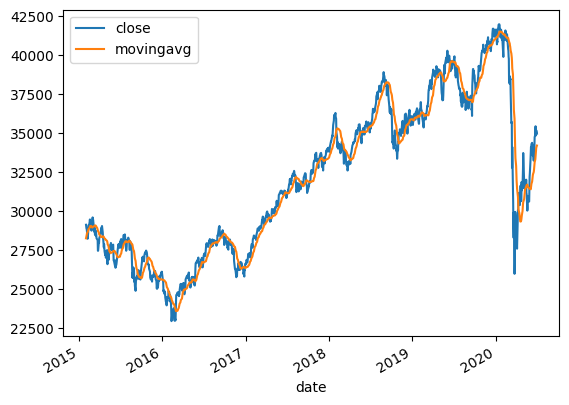

In [31]:
stock_weekmovingavg(4, bse_data).plot()


In [32]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

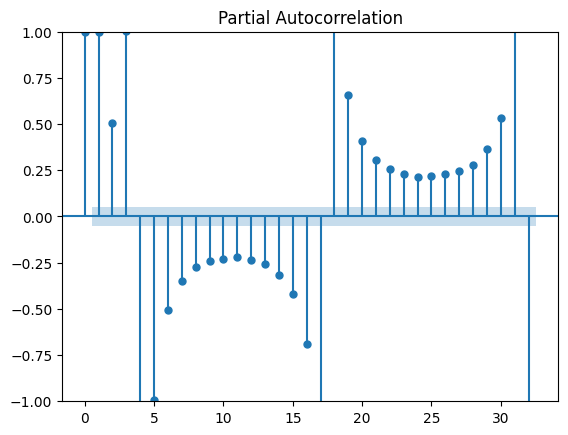

In [33]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

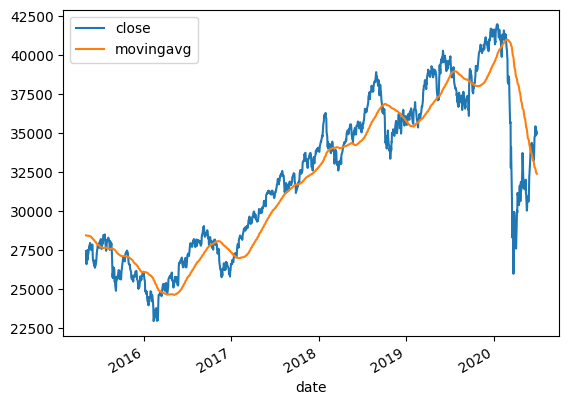

In [34]:
stock_weekmovingavg(16, bse_data).head()
stock_weekmovingavg(16, bse_data).plot()
plt.show()

In [35]:
altdata_sixteenweek = stock_weekmovingavg(16, bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)
alt.Chart(altdata_sixteenweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

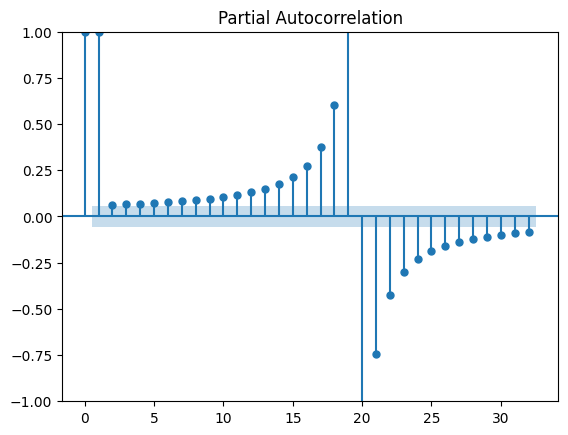

In [36]:
plotsixteenweek = altdata_sixteenweek.filter(['date', 'movingavg'], axis=1)
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_sixteenweek['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

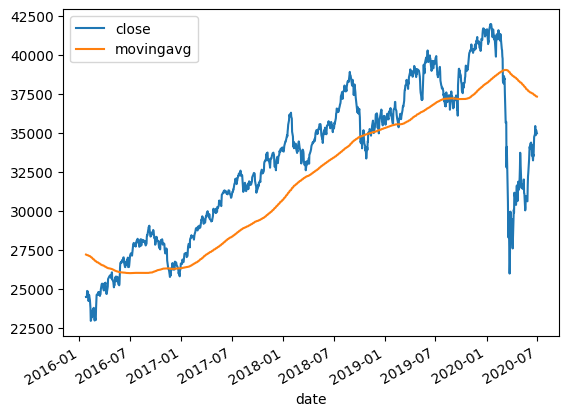

In [37]:
stock_weekmovingavg(52, bse_data).head()
stock_weekmovingavg(52, bse_data).plot()
plt.show()


In [38]:
altdata_fiftytwoweek = stock_weekmovingavg(52, bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)
alt.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

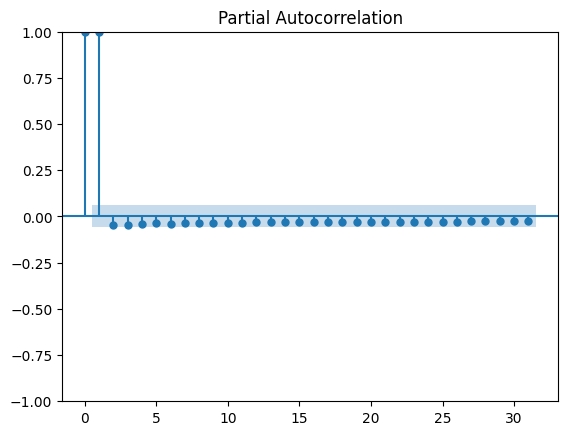

In [39]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['date', 'movingavg'], axis=1)
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fiftytwoweek['date']))) 
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()